In [3]:
# Import Necessary Libraries and matrices
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
#Load and Preprocess the Dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Target"] = housing.target 

df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


(None,
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
 count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
 mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
 std        1.899822     12.585558      2.474173      0.473911   1132.462122   
 min        0.499900      1.000000      0.846154      0.333333      3.000000   
 25%        2.563400     18.000000      4.440716      1.006079    787.000000   
 50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
 75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
 max       15.000100     52.000000    141.909091     34.066667  35682.000000   
 
            AveOccup      Latitude     Longitude        Target  
 count  20640.000000  20640.000000  20640.000000  20640.000000  
 mean       3.070655     35.631861   -119.569704      2.068558  
 std       10.386050      2.135952      2.003532      1.153956  
 min       

In [7]:
# Check for missing values
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [9]:
X = df.drop(columns=["Target"]) 
y = df["Target"] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

* No missing values in the dataset 
* Feature scaling (StandardScaler) ensures fair treatment for all features, as some may have large numeric ranges

In [11]:
#Train Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Store evaluation metrics
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred)
    }

In [13]:
#Evaluate and Compare Models
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="MSE"))
results_df

                                     MSE       MAE  R² Score
Random Forest Regressor         0.255498  0.327613  0.805024
Gradient Boosting Regressor     0.293999  0.371650  0.775643
Support Vector Regressor (SVR)  0.355198  0.397763  0.728941
Decision Tree Regressor         0.494272  0.453784  0.622811
Linear Regression               0.555892  0.533200  0.575788


,MSE,MAE,R² Score
Linear Regression,0.555892,0.533200,0.575788
Decision Tree Regressor,0.494272,0.453784,0.622811
Random Forest Regressor,0.255498,0.327613,0.805024
Gradient Boosting Regressor,0.293999,0.371650,0.775643
Support Vector Regressor (SVR),0.355198,0.397763,0.728941


* Lower MSE & MAE → Better model performance
* Higher R² score → Model explains variance better


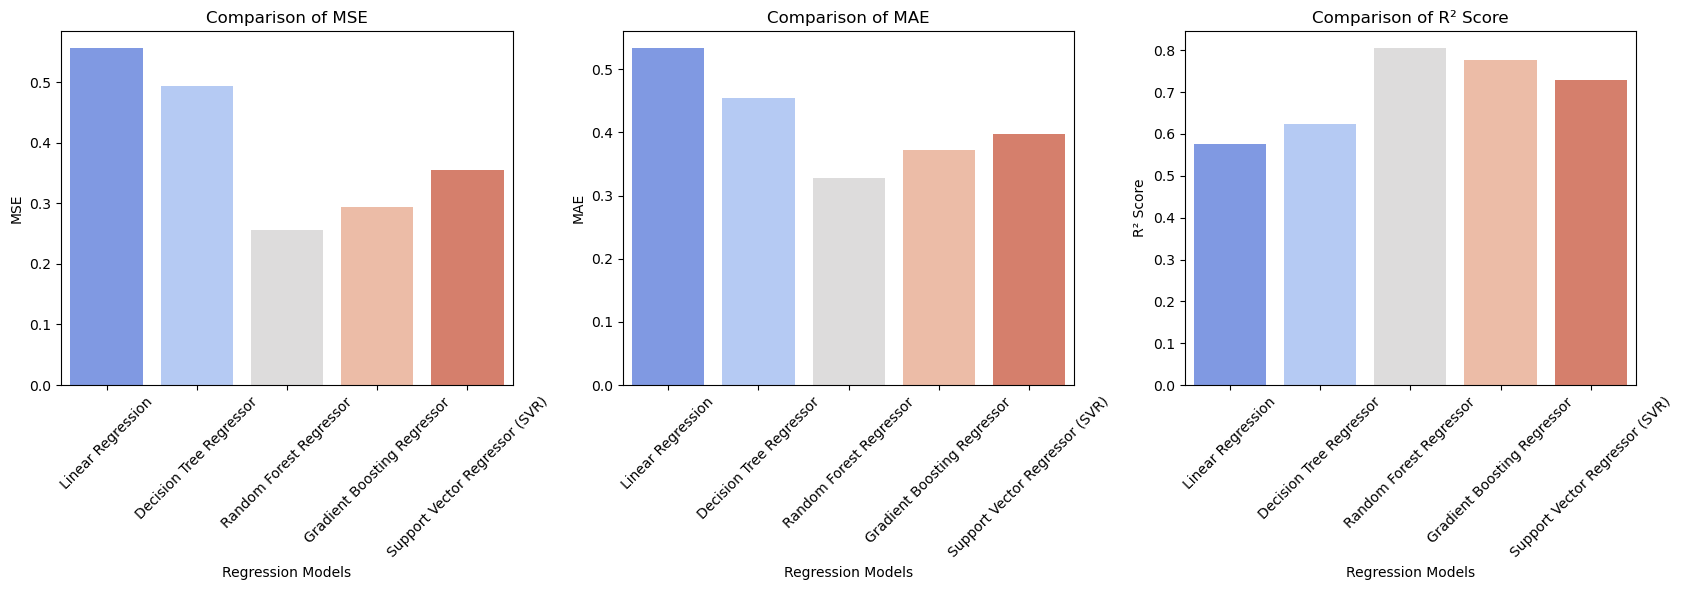

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(results).T
plt.figure(figsize=(17, 6))
metrics = ["MSE", "MAE", "R² Score"]
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette="coolwarm")
    plt.xticks(rotation=45)  
    plt.title(f"Comparison of {metric}")
    plt.ylabel(metric)
    plt.xlabel("Regression Models")

plt.tight_layout()
plt.show()

### **Model Performance Analysis**
After evaluating all regression models, the **Random Forest Regressor** performed the best, while **Linear Regression** performed the worst. This conclusion is based on the following metrics:

- **Mean Squared Error (MSE) & Mean Absolute Error (MAE)**  
  - Random Forest Regressor had the **lowest** MSE and MAE, indicating more accurate predictions.  
  - Linear Regression had the **highest** MSE and MAE, meaning its predictions were less reliable.

- **Reason for Random Forest's Superior Performance**  
  - It is an **ensemble method**, meaning it builds multiple decision trees and averages their predictions, reducing overfitting and improving accuracy.  
  - It captures **non-linear relationships** in the data better than Linear Regression.  
  - It is more **robust to outliers** and feature interactions.

- **Reason for Linear Regression's Poor Performance**  
  - Linear Regression assumes a **linear relationship** between features and the target variable, which may not be true for this dataset.  
  - It is more sensitive to **outliers** and does not handle complex patterns well.  

### **Conclusion**
Based on the results, **Random Forest Regressor is the most suitable model** for predicting California housing prices. 